In [985]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tabulate import tabulate
import seaborn as sns
from pandas.plotting import parallel_coordinates
from sklearn.preprocessing import MinMaxScaler
from datetime import date, datetime
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import seaborn as sns

In [528]:
os.getcwd()

'/Users/eleonoracocciu/Desktop/Unipi/Data Mining Advanced/fma_metadata'

In [529]:
def tab_missing_values(df):
    FeatureMissValcount = 0
    table_ord = []
    table_ord_def = []
    tot = df.shape[0]
    headers = ["Feature", "Number of missing values", "Percentage", "Present values"]
    
    for i, value in (df.isna().sum().items()):
        if value!=0:
            FeatureMissValcount+=1
            tup = (value, tot)
            table_ord.append((i, (value, tot)))
        
    for element in sorted(table_ord, key=lambda tup:(-tup[1][0], tup[0])):
        percentage = (element[1][0] / element[1][1]) * 100
        percentage = "%.2f %%" %(percentage)
        difference = element[1][1] - element[1][0]
        new_tup = ' / '.join(map(str, (element[1])))
        table_ord_def.append((element[0], new_tup, percentage, difference))
    
    return table_ord_def, headers, FeatureMissValcount

In [530]:
def count_zeros(df):
    tab = []
    headers = ["Features", "Zero values"]
    count = 0

    for column in df.columns:
        count_zeros = (df[column] == 0).sum()
        if count_zeros > 0:
            tab.append((column, count_zeros))
            count+=1
    
    return tab, headers, count

In [778]:
def plot_radar_plot(df, categories, target_class, title, cmap):
    
    num_vars = len(categories)

    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar = True))

    classes = df[target_class].dropna().unique().tolist()
    
    num = 0
    
    if cmap:
        #palette = plt.get_cmap('Accent')
        #palette = ['#0091C2', '#002EB8', '#CC0066', '#FF9124', '#668CFF', '#66CCFF', '#CCCC00', '#FFFF24', '#CC6600', 
          #'#FF61B0', '#B061FF', '#CC6699', '#336600', '#52A300', '#70E000', '#99CC00']
        palette = ['#CC6699','#CC0066', '#FF9124', '#CCCC00']
        
    else:
        palette = ['#CC0066', '#FF9124', '#CCCC00']
        
    
    for i, element in enumerate(classes):
        color = palette[num]
        num+=1
        dfc = df[df[target_class] == element]
        for index, row in dfc.iterrows():
            #val = add_to_radar(dfc, index, color, element)
            val = dfc.loc[index].drop(target_class).values.flatten().tolist()
            val += val[:1]
            ax.plot(angles, val, color= color, linewidth=1, label = element)

    #ax.legend()
    handles, labels = ax.get_legend_handles_labels()  
    lgd = dict(zip(labels, handles))
    ax.legend(lgd.values(), lgd.keys(), loc='upper right', bbox_to_anchor=(1.9, 1), title=title, frameon=True, fontsize = 12)


    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)

    # Draw axis lines for each angle and label.
    ax.set_thetagrids(np.degrees(angles), categories)

    # Go through labels and adjust alignment based on where
    # it is in the circle.
    for category, angle in zip(ax.get_xticklabels(), angles):
        if angle in (0, np.pi):
            category.set_horizontalalignment('center')
        elif 0 < angle < np.pi:
            category.set_horizontalalignment('left')
        else:
            category.set_horizontalalignment('right')

    ax.set_rlabel_position(180 / num_vars)

    # Add some custom styling.
    
    # Change the color of the tick labels.
    ax.tick_params(colors='#222222')
    
    # Make the y-axis (0-100) labels smaller.
    ax.tick_params(axis='y', labelsize=8)
    
    # Change the color of the circular gridlines.
    ax.grid(color='#AAAAAA')
    
    # Change the color of the outermost gridline (the spine).
    ax.spines['polar'].set_color('#222222')
    
    # Change the background color inside the circle itself.
    ax.set_facecolor('#FAFAFA')

    # Add title.
    ax.set_title("Comparing Track's Genre Across Dimensions", y=1.08, fontsize = 16)
    
    plt.show()

In [1041]:
def plot_distributions(df, target_col, more):
    
    if more:
        #colors = ['#0091C2', '#002EB8', '#CC0066', '#FF9124', '#668CFF', '#66CCFF', '#CCCC00', '#FFFF24', '#CC6600', 
          #'#FF61B0', '#B061FF', '#CC6699', '#336600', '#52A300', '#70E000', '#99CC00']
        colors = ['#CC6699', '#CC0066', '#FF9124', '#CCCC00']
        
    else: 
        colors = ['#CC0066', '#FF9124', '#CCCC00']
        
        
    for column in df.columns:
    
        if ((column != target_col) & (column != 'artist_active_year_begin') & (column != 'album_year_created')):

            fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (20, 10))
            ditrib_list = []
            list_element = []

            for element in df[target_col].dropna().unique():
                ditrib_list.append(df[df[target_col] == element][column])  #distribution
                list_element.append('%s' % element)                 #genre

            ax.hist(ditrib_list, label = list_element, color = colors)
            ax.legend(loc='upper right', title = "Track's genre", frameon=True, fontsize = 12)
            ax.set_title(column + " histogram", fontsize = 16)
            
            if (column == 'track_duration'):
                ax.xaxis.set_major_locator(MultipleLocator(500))
                ax.xaxis.set_minor_locator(MultipleLocator(100))
                ax.tick_params(which='major', length=7)
                ax.tick_params(which='minor', length=4, color='r')

            plt.show()

In [535]:
def get_season(date_time):
    
    s = np.nan
    leap_year = 2000
    seasons = [('winter', (date(leap_year, 1, 1), date(leap_year, 3, 20))),
               ('spring', (date(leap_year, 3, 21), date(leap_year, 6, 20))),
               ('summer', (date(leap_year, 6, 21), date(leap_year, 9, 22))),
               ('autumn', (date(leap_year, 9, 23), date(leap_year, 12, 20))),
               ('winter', (date(leap_year, 12, 21), date(leap_year, 12, 31)))]
    
    if isinstance(date_time, datetime):
        date_time = date_time.date()

    date_time = date_time.replace(year=leap_year)

    for (season, (start, end)) in seasons:
        if (start <= date_time <= end):
            s = season
            
    return s

In [536]:
def compare_years(df, col1, col2):
    
    released = 0
    created = 0
    both_zero = 0
    one_zero = 0
    
    for i, row in enumerate(df[col1]):
        
        idx_col1 = df.columns.get_loc(col1)
        idx_col2 = df.columns.get_loc(col2)
        
        if not((pd.isnull(df.iloc[i, idx_col1])) and not (pd.isnull(df.iloc[i, idx_col2]))):
            
            if ((df.iloc[i, idx_col1] != 0) and (df.iloc[i, idx_col2] != 0)):
                a1 = df.iloc[i, idx_col1]
                a2 = df.iloc[i, idx_col2]
                
                if (a2 < a1):  #se l'anno di rilascio è precedente a quello di creazione
                    released+=1
                elif (a1 <= a2):  #se l'anno di creazione è precedente o uguale a quello di rilascio
                    created+=1
                    
            elif ((df.iloc[i, idx_col1] == 0) and (df.iloc[i, idx_col2] == 0)):
                both_zero+=1
                
            else:
                one_zero+=1
                    
    return released, created, both_zero, one_zero

<h1>Tracks dataset</h1>

In [607]:
df_tracks = pd.read_csv("tracks.csv")

In [608]:
df_tracks.head()

,Unnamed: 0,album,album.1,album.2,album.3,album.4,album.5,album.6,album.7,album.8,...,track.10,track.11,track.12,track.13,track.14,track.15,track.16,track.17,track.18,track.19
0,NaN,comments,date_created,date_released,engineer,favorites,id,information,listens,producer,...,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
1,track_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,4656,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,NaN,3,NaN,[],Food
3,3,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,1470,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514,NaN,4,NaN,[],Electric Ave
4,5,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,1933,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,NaN,6,NaN,[],This World


We rename the columns of the dataset because there are two rows at the beginning, one for the category (<b>album</b>, <b>track</b>, <b>set</b> and <b>artist</b>) and one for the relative feature. 
So we add the name of category to each relative feature, so that we can drop the first tho rows without loosing information with respect to the category.

In [609]:
for i, column in enumerate (df_tracks.columns):
    col = ''.join([i for i in column if not i.isdigit()])
    if col[-1] == ".":
        col = col.replace(".", "_")
    else :
        col = col+"_"
    #print (i, " ", col + str(df_tracks.iloc[0][column]))
    col = col + str(df_tracks.iloc[0][column])
    df_tracks = df_tracks.rename({column: col}, axis = 1)

In [610]:
df_tracks

,Unnamed: _nan,album_comments,album_date_created,album_date_released,album_engineer,album_favorites,album_id,album_information,album_listens,album_producer,...,track_information,track_interest,track_language_code,track_license,track_listens,track_lyricist,track_number,track_publisher,track_tags,track_title
0,NaN,comments,date_created,date_released,engineer,favorites,id,information,listens,producer,...,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
1,track_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,4656,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,NaN,3,NaN,[],Food
3,3,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,1470,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514,NaN,4,NaN,[],Electric Ave
4,5,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,1933,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,NaN,6,NaN,[],This World
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106571,155316,0,2017-03-30 15:20:35,2017-02-17 00:00:00,NaN,0,22940,"<p>A live performance at Monty Hall on Feb 17,...",1506,Monty Hall,...,NaN,122,NaN,Creative Commons Attribution-NonCommercial-NoD...,102,NaN,3,NaN,[],The Auger
106572,155317,0,2017-03-30 15:20:35,2017-02-17 00:00:00,NaN,0,22940,"<p>A live performance at Monty Hall on Feb 17,...",1506,Monty Hall,...,NaN,194,NaN,Creative Commons Attribution-NonCommercial-NoD...,165,NaN,4,NaN,[],Let's Skin Ruby
106573,155318,0,2017-03-30 15:20:35,2017-02-17 00:00:00,NaN,0,22940,"<p>A live performance at Monty Hall on Feb 17,...",1506,Monty Hall,...,NaN,214,NaN,Creative Commons Attribution-NonCommercial-NoD...,168,NaN,6,NaN,[],My House Smells Like Kim Deal/Pulp
106574,155319,0,2017-03-30 15:20:35,2017-02-17 00:00:00,NaN,0,22940,"<p>A live performance at Monty Hall on Feb 17,...",1506,Monty Hall,...,NaN,336,NaN,Creative Commons Attribution-NonCommercial-NoD...,294,NaN,5,NaN,[],The Man With Two Mouths


In [611]:
new_name = df_tracks.iloc[1]['Unnamed: _nan']
df_tracks = df_tracks.rename({'Unnamed: _nan': new_name}, axis = 1)

df_tracks

,track_id,album_comments,album_date_created,album_date_released,album_engineer,album_favorites,album_id,album_information,album_listens,album_producer,...,track_information,track_interest,track_language_code,track_license,track_listens,track_lyricist,track_number,track_publisher,track_tags,track_title
0,NaN,comments,date_created,date_released,engineer,favorites,id,information,listens,producer,...,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
1,track_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,4656,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,NaN,3,NaN,[],Food
3,3,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,1470,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514,NaN,4,NaN,[],Electric Ave
4,5,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,1933,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,NaN,6,NaN,[],This World
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106571,155316,0,2017-03-30 15:20:35,2017-02-17 00:00:00,NaN,0,22940,"<p>A live performance at Monty Hall on Feb 17,...",1506,Monty Hall,...,NaN,122,NaN,Creative Commons Attribution-NonCommercial-NoD...,102,NaN,3,NaN,[],The Auger
106572,155317,0,2017-03-30 15:20:35,2017-02-17 00:00:00,NaN,0,22940,"<p>A live performance at Monty Hall on Feb 17,...",1506,Monty Hall,...,NaN,194,NaN,Creative Commons Attribution-NonCommercial-NoD...,165,NaN,4,NaN,[],Let's Skin Ruby
106573,155318,0,2017-03-30 15:20:35,2017-02-17 00:00:00,NaN,0,22940,"<p>A live performance at Monty Hall on Feb 17,...",1506,Monty Hall,...,NaN,214,NaN,Creative Commons Attribution-NonCommercial-NoD...,168,NaN,6,NaN,[],My House Smells Like Kim Deal/Pulp
106574,155319,0,2017-03-30 15:20:35,2017-02-17 00:00:00,NaN,0,22940,"<p>A live performance at Monty Hall on Feb 17,...",1506,Monty Hall,...,NaN,336,NaN,Creative Commons Attribution-NonCommercial-NoD...,294,NaN,5,NaN,[],The Man With Two Mouths


In [612]:
df_tracks = df_tracks.iloc[2:]

In [613]:
df_tracks

,track_id,album_comments,album_date_created,album_date_released,album_engineer,album_favorites,album_id,album_information,album_listens,album_producer,...,track_information,track_interest,track_language_code,track_license,track_listens,track_lyricist,track_number,track_publisher,track_tags,track_title
2,2,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,4656,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,NaN,3,NaN,[],Food
3,3,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,1470,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514,NaN,4,NaN,[],Electric Ave
4,5,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,1933,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,NaN,6,NaN,[],This World
5,10,0,2008-11-26 01:45:08,2008-02-06 00:00:00,NaN,4,6,NaN,47632,NaN,...,NaN,54881,en,Attribution-NonCommercial-NoDerivatives (aka M...,50135,NaN,1,NaN,[],Freeway
6,20,0,2008-11-26 01:45:05,2009-01-06 00:00:00,NaN,2,4,"<p> ""spiritual songs"" from Nicky Cook</p>",2710,NaN,...,NaN,978,en,Attribution-NonCommercial-NoDerivatives (aka M...,361,NaN,3,NaN,[],Spiritual Level
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106571,155316,0,2017-03-30 15:20:35,2017-02-17 00:00:00,NaN,0,22940,"<p>A live performance at Monty Hall on Feb 17,...",1506,Monty Hall,...,NaN,122,NaN,Creative Commons Attribution-NonCommercial-NoD...,102,NaN,3,NaN,[],The Auger
106572,155317,0,2017-03-30 15:20:35,2017-02-17 00:00:00,NaN,0,22940,"<p>A live performance at Monty Hall on Feb 17,...",1506,Monty Hall,...,NaN,194,NaN,Creative Commons Attribution-NonCommercial-NoD...,165,NaN,4,NaN,[],Let's Skin Ruby
106573,155318,0,2017-03-30 15:20:35,2017-02-17 00:00:00,NaN,0,22940,"<p>A live performance at Monty Hall on Feb 17,...",1506,Monty Hall,...,NaN,214,NaN,Creative Commons Attribution-NonCommercial-NoD...,168,NaN,6,NaN,[],My House Smells Like Kim Deal/Pulp
106574,155319,0,2017-03-30 15:20:35,2017-02-17 00:00:00,NaN,0,22940,"<p>A live performance at Monty Hall on Feb 17,...",1506,Monty Hall,...,NaN,336,NaN,Creative Commons Attribution-NonCommercial-NoD...,294,NaN,5,NaN,[],The Man With Two Mouths


Since we eliminated two rows, we need to reset indexes.

In [614]:
df_tracks = df_tracks.reset_index(drop=True)

In [615]:
df_tracks

,track_id,album_comments,album_date_created,album_date_released,album_engineer,album_favorites,album_id,album_information,album_listens,album_producer,...,track_information,track_interest,track_language_code,track_license,track_listens,track_lyricist,track_number,track_publisher,track_tags,track_title
0,2,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,4656,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,NaN,3,NaN,[],Food
1,3,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,1470,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514,NaN,4,NaN,[],Electric Ave
2,5,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,1933,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,NaN,6,NaN,[],This World
3,10,0,2008-11-26 01:45:08,2008-02-06 00:00:00,NaN,4,6,NaN,47632,NaN,...,NaN,54881,en,Attribution-NonCommercial-NoDerivatives (aka M...,50135,NaN,1,NaN,[],Freeway
4,20,0,2008-11-26 01:45:05,2009-01-06 00:00:00,NaN,2,4,"<p> ""spiritual songs"" from Nicky Cook</p>",2710,NaN,...,NaN,978,en,Attribution-NonCommercial-NoDerivatives (aka M...,361,NaN,3,NaN,[],Spiritual Level
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106569,155316,0,2017-03-30 15:20:35,2017-02-17 00:00:00,NaN,0,22940,"<p>A live performance at Monty Hall on Feb 17,...",1506,Monty Hall,...,NaN,122,NaN,Creative Commons Attribution-NonCommercial-NoD...,102,NaN,3,NaN,[],The Auger
106570,155317,0,2017-03-30 15:20:35,2017-02-17 00:00:00,NaN,0,22940,"<p>A live performance at Monty Hall on Feb 17,...",1506,Monty Hall,...,NaN,194,NaN,Creative Commons Attribution-NonCommercial-NoD...,165,NaN,4,NaN,[],Let's Skin Ruby
106571,155318,0,2017-03-30 15:20:35,2017-02-17 00:00:00,NaN,0,22940,"<p>A live performance at Monty Hall on Feb 17,...",1506,Monty Hall,...,NaN,214,NaN,Creative Commons Attribution-NonCommercial-NoD...,168,NaN,6,NaN,[],My House Smells Like Kim Deal/Pulp
106572,155319,0,2017-03-30 15:20:35,2017-02-17 00:00:00,NaN,0,22940,"<p>A live performance at Monty Hall on Feb 17,...",1506,Monty Hall,...,NaN,336,NaN,Creative Commons Attribution-NonCommercial-NoD...,294,NaN,5,NaN,[],The Man With Two Mouths


In [616]:
df_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106574 entries, 0 to 106573
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   track_id                  106574 non-null  object
 1   album_comments            106574 non-null  object
 2   album_date_created        103045 non-null  object
 3   album_date_released       70294 non-null   object
 4   album_engineer            15295 non-null   object
 5   album_favorites           106574 non-null  object
 6   album_id                  106574 non-null  object
 7   album_information         83149 non-null   object
 8   album_listens             106574 non-null  object
 9   album_producer            18060 non-null   object
 10  album_tags                106574 non-null  object
 11  album_title               105549 non-null  object
 12  album_tracks              106574 non-null  object
 13  album_type                100066 non-null  object
 14  arti

In [617]:
tab, headers, miss_val = tab_missing_values(df_tracks)

print(tabulate(tab, headers, tablefmt = "simple", colalign = ("left", "right", "right")))

print()
print("{} features with missing values".format(miss_val))

Feature                     Number of missing values    Percentage    Present values
------------------------  --------------------------  ------------  ----------------
track_lyricist                       106263 / 106574       99.71 %               311
track_publisher                      105311 / 106574       98.81 %              1263
track_information                    104225 / 106574       97.80 %              2349
track_composer                       102904 / 106574       96.56 %              3670
artist_active_year_end               101199 / 106574       94.96 %              5375
artist_wikipedia_page                100993 / 106574       94.76 %              5581
track_date_recorded                  100415 / 106574       94.22 %              6159
artist_related_projects               93422 / 106574       87.66 %             13152
artist_associated_labels              92303 / 106574       86.61 %             14271
track_language_code                   91550 / 106574       85.90 

<b>We create a new column which contains years of creation and release of albums</b>

In [660]:
tracks = df_tracks.copy()

In [661]:
tracks

,track_id,album_comments,album_date_created,album_date_released,album_engineer,album_favorites,album_id,album_information,album_listens,album_producer,...,track_information,track_interest,track_language_code,track_license,track_listens,track_lyricist,track_number,track_publisher,track_tags,track_title
0,2,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,4656,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,NaN,3,NaN,[],Food
1,3,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,1470,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514,NaN,4,NaN,[],Electric Ave
2,5,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,1933,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,NaN,6,NaN,[],This World
3,10,0,2008-11-26 01:45:08,2008-02-06 00:00:00,NaN,4,6,NaN,47632,NaN,...,NaN,54881,en,Attribution-NonCommercial-NoDerivatives (aka M...,50135,NaN,1,NaN,[],Freeway
4,20,0,2008-11-26 01:45:05,2009-01-06 00:00:00,NaN,2,4,"<p> ""spiritual songs"" from Nicky Cook</p>",2710,NaN,...,NaN,978,en,Attribution-NonCommercial-NoDerivatives (aka M...,361,NaN,3,NaN,[],Spiritual Level
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106569,155316,0,2017-03-30 15:20:35,2017-02-17 00:00:00,NaN,0,22940,"<p>A live performance at Monty Hall on Feb 17,...",1506,Monty Hall,...,NaN,122,NaN,Creative Commons Attribution-NonCommercial-NoD...,102,NaN,3,NaN,[],The Auger
106570,155317,0,2017-03-30 15:20:35,2017-02-17 00:00:00,NaN,0,22940,"<p>A live performance at Monty Hall on Feb 17,...",1506,Monty Hall,...,NaN,194,NaN,Creative Commons Attribution-NonCommercial-NoD...,165,NaN,4,NaN,[],Let's Skin Ruby
106571,155318,0,2017-03-30 15:20:35,2017-02-17 00:00:00,NaN,0,22940,"<p>A live performance at Monty Hall on Feb 17,...",1506,Monty Hall,...,NaN,214,NaN,Creative Commons Attribution-NonCommercial-NoD...,168,NaN,6,NaN,[],My House Smells Like Kim Deal/Pulp
106572,155319,0,2017-03-30 15:20:35,2017-02-17 00:00:00,NaN,0,22940,"<p>A live performance at Monty Hall on Feb 17,...",1506,Monty Hall,...,NaN,336,NaN,Creative Commons Attribution-NonCommercial-NoD...,294,NaN,5,NaN,[],The Man With Two Mouths


In [657]:
#dates = tracks['album_date_created'].fillna(0).astype(str)

In [662]:
dates = tracks['album_date_created'].astype(str)
tracks['album_date_created'] = dates.apply(lambda x: x.split()[0])
tracks['album_year_created'] = pd.DatetimeIndex(tracks['album_date_created']).year.fillna(0.0).astype(int)

In [663]:
dates = tracks['album_date_released'].astype(str)
tracks['album_date_released'] = dates.apply(lambda x: x.split()[0])
tracks['album_year_released'] = pd.DatetimeIndex(tracks['album_date_released']).year.fillna(0.0).astype(int)

In [668]:
date_columns = ['artist_active_year_begin', 'artist_date_created', 'track_date_created']

In [669]:
for column in date_columns:
    dates = tracks[column].astype(str)
    tracks[column] = dates.apply(lambda x: x.split()[0])
    tracks[column] = pd.DatetimeIndex(tracks[column]).year.fillna(0.0).astype(int)

In [670]:
tracks

,track_id,album_comments,album_date_created,album_date_released,album_engineer,album_favorites,album_id,album_information,album_listens,album_producer,...,track_language_code,track_license,track_listens,track_lyricist,track_number,track_publisher,track_tags,track_title,album_year_created,album_year_released
0,2,0,2008-11-26,2009-01-05,NaN,4,1,<p></p>,6073,NaN,...,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,NaN,3,NaN,[],Food,2008,2009
1,3,0,2008-11-26,2009-01-05,NaN,4,1,<p></p>,6073,NaN,...,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514,NaN,4,NaN,[],Electric Ave,2008,2009
2,5,0,2008-11-26,2009-01-05,NaN,4,1,<p></p>,6073,NaN,...,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,NaN,6,NaN,[],This World,2008,2009
3,10,0,2008-11-26,2008-02-06,NaN,4,6,NaN,47632,NaN,...,en,Attribution-NonCommercial-NoDerivatives (aka M...,50135,NaN,1,NaN,[],Freeway,2008,2008
4,20,0,2008-11-26,2009-01-06,NaN,2,4,"<p> ""spiritual songs"" from Nicky Cook</p>",2710,NaN,...,en,Attribution-NonCommercial-NoDerivatives (aka M...,361,NaN,3,NaN,[],Spiritual Level,2008,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106569,155316,0,2017-03-30,2017-02-17,NaN,0,22940,"<p>A live performance at Monty Hall on Feb 17,...",1506,Monty Hall,...,NaN,Creative Commons Attribution-NonCommercial-NoD...,102,NaN,3,NaN,[],The Auger,2017,2017
106570,155317,0,2017-03-30,2017-02-17,NaN,0,22940,"<p>A live performance at Monty Hall on Feb 17,...",1506,Monty Hall,...,NaN,Creative Commons Attribution-NonCommercial-NoD...,165,NaN,4,NaN,[],Let's Skin Ruby,2017,2017
106571,155318,0,2017-03-30,2017-02-17,NaN,0,22940,"<p>A live performance at Monty Hall on Feb 17,...",1506,Monty Hall,...,NaN,Creative Commons Attribution-NonCommercial-NoD...,168,NaN,6,NaN,[],My House Smells Like Kim Deal/Pulp,2017,2017
106572,155319,0,2017-03-30,2017-02-17,NaN,0,22940,"<p>A live performance at Monty Hall on Feb 17,...",1506,Monty Hall,...,NaN,Creative Commons Attribution-NonCommercial-NoD...,294,NaN,5,NaN,[],The Man With Two Mouths,2017,2017


In [671]:
tab, headers, miss_val = tab_missing_values(tracks)

print(tabulate(tab, headers, tablefmt = "simple", colalign = ("left", "right", "right")))

print()
print("{} features with missing values".format(miss_val))

Feature                     Number of missing values    Percentage    Present values
------------------------  --------------------------  ------------  ----------------
track_lyricist                       106263 / 106574       99.71 %               311
track_publisher                      105311 / 106574       98.81 %              1263
track_information                    104225 / 106574       97.80 %              2349
track_composer                       102904 / 106574       96.56 %              3670
artist_active_year_end               101199 / 106574       94.96 %              5375
artist_wikipedia_page                100993 / 106574       94.76 %              5581
track_date_recorded                  100415 / 106574       94.22 %              6159
artist_related_projects               93422 / 106574       87.66 %             13152
artist_associated_labels              92303 / 106574       86.61 %             14271
track_language_code                   91550 / 106574       85.90 

In [672]:
for element in tab[:13]:
    column = element[0]
    if column != 'artist_active_year_begin':
        tracks = tracks.drop(column, axis = 1)

In [673]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106574 entries, 0 to 106573
Data columns (total 42 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   track_id                  106574 non-null  object
 1   album_comments            106574 non-null  object
 2   album_date_created        106574 non-null  object
 3   album_date_released       106574 non-null  object
 4   album_favorites           106574 non-null  object
 5   album_id                  106574 non-null  object
 6   album_information         83149 non-null   object
 7   album_listens             106574 non-null  object
 8   album_tags                106574 non-null  object
 9   album_title               105549 non-null  object
 10  album_tracks              106574 non-null  object
 11  album_type                100066 non-null  object
 12  artist_active_year_begin  106574 non-null  int64 
 13  artist_bio                71156 non-null   object
 14  arti

In [674]:
features_to_drop = ["album_comments", "album_favorites", "album_information", "album_title",
 "artist_bio", "artist_comments", "artist_favorites", "album_tags", "track_tags",
 "artist_longitude", "artist_members", "artist_name", "artist_tags", "artist_website", "track_comments",
 "track_favorites", "track_interest", "track_license", "track_listens", "track_title", "album_listens"]

In [675]:
for column in features_to_drop:
    tracks = tracks.drop(column, axis = 1)

In [676]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106574 entries, 0 to 106573
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   track_id                  106574 non-null  object
 1   album_date_created        106574 non-null  object
 2   album_date_released       106574 non-null  object
 3   album_id                  106574 non-null  object
 4   album_tracks              106574 non-null  object
 5   album_type                100066 non-null  object
 6   artist_active_year_begin  106574 non-null  int64 
 7   artist_date_created       106574 non-null  int64 
 8   artist_id                 106574 non-null  object
 9   artist_location           70210 non-null   object
 10  set_split                 106574 non-null  object
 11  set_subset                106574 non-null  object
 12  track_bit_rate            106574 non-null  object
 13  track_date_created        106574 non-null  int64 
 14  trac

<b>We verify if there are duplicates</b>

In [678]:
tracks.duplicated().any()

False

In [679]:
tracks['album_date_created'] = pd.to_datetime(tracks['album_date_created'])
tracks['album_date_released'] = pd.to_datetime(tracks['album_date_released'])

<b>We create the new column with season</b>

In [680]:
tracks['season_album_created'] = tracks['album_date_created'].apply(lambda x: get_season(x))

In [681]:
tracks

,track_id,album_date_created,album_date_released,album_id,album_tracks,album_type,artist_active_year_begin,artist_date_created,artist_id,artist_location,...,track_bit_rate,track_date_created,track_duration,track_genre_top,track_genres,track_genres_all,track_number,album_year_created,album_year_released,season_album_created
0,2,2008-11-26,2009-01-05,1,7,Album,2006,2008,1,New Jersey,...,256000,2008,168,Hip-Hop,[21],[21],3,2008,2009,autumn
1,3,2008-11-26,2009-01-05,1,7,Album,2006,2008,1,New Jersey,...,256000,2008,237,Hip-Hop,[21],[21],4,2008,2009,autumn
2,5,2008-11-26,2009-01-05,1,7,Album,2006,2008,1,New Jersey,...,256000,2008,206,Hip-Hop,[21],[21],6,2008,2009,autumn
3,10,2008-11-26,2008-02-06,6,2,Album,0,2008,6,NaN,...,192000,2008,161,Pop,[10],[10],1,2008,2008,autumn
4,20,2008-11-26,2009-01-06,4,13,Album,1990,2008,4,Colchester England,...,256000,2008,311,NaN,"[76, 103]","[17, 10, 76, 103]",3,2008,2009,autumn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106569,155316,2017-03-30,2017-02-17,22940,6,Live Performance,0,2017,24357,New Jersey,...,320000,2017,162,Rock,[25],"[25, 12]",3,2017,2017,spring
106570,155317,2017-03-30,2017-02-17,22940,6,Live Performance,0,2017,24357,New Jersey,...,320000,2017,217,Rock,[25],"[25, 12]",4,2017,2017,spring
106571,155318,2017-03-30,2017-02-17,22940,6,Live Performance,0,2017,24357,New Jersey,...,320000,2017,404,Rock,[25],"[25, 12]",6,2017,2017,spring
106572,155319,2017-03-30,2017-02-17,22940,6,Live Performance,0,2017,24357,New Jersey,...,320000,2017,146,Rock,[25],"[25, 12]",5,2017,2017,spring


In [685]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106574 entries, 0 to 106573
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   track_id                  106574 non-null  object        
 1   album_date_created        103045 non-null  datetime64[ns]
 2   album_date_released       70294 non-null   datetime64[ns]
 3   album_id                  106574 non-null  object        
 4   album_tracks              106574 non-null  object        
 5   album_type                100066 non-null  object        
 6   artist_active_year_begin  106574 non-null  int64         
 7   artist_date_created       106574 non-null  int64         
 8   artist_id                 106574 non-null  object        
 9   artist_location           70210 non-null   object        
 10  set_split                 106574 non-null  object        
 11  set_subset                106574 non-null  object        
 12  tr

<h3>Comparisons</h3>

<b>Album year created - Album year released</b>

In [688]:
released, created, both_zero, one_zero = compare_years(tracks, 'album_year_created', 'album_year_released')

print("{0:45} {1}".format("anno_rilascio_album < anno_creazione_album: ", released))
print()
print("{0:39} {1}".format("anno_creazione_album <= anno_rilascio_album: ", created))
print()
print("{0:45} {1}".format("entrambi zero: ", both_zero))
print()
print("{0:45} {1}".format("solo uno zero: ", one_zero))
print()
print("{0:45} {1}".format("somma: ", released + created + both_zero + one_zero))

anno_rilascio_album < anno_creazione_album:   26500

anno_creazione_album <= anno_rilascio_album:  43794

entrambi zero:                                3529

solo uno zero:                                32751

somma:                                        106574


In [689]:
no_zero = tracks['album_year_released'].to_numpy().nonzero()
df_no_zero = tracks.loc[no_zero]
df_no_zero = df_no_zero[(df_no_zero['album_year_released'] < df_no_zero['album_year_created'])]

In [690]:
df_no_zero[['album_year_released', 'album_year_created']]

,album_year_released,album_year_created
12,2006,2008
13,2006,2008
15,2007,2008
17,2005,2008
20,1995,2008
...,...,...
106296,2016,2017
106297,2016,2017
106298,2016,2017
106299,2016,2017


<b>Artist active year begin - Artist date created</b>

In [691]:
creation_artist, year_begin_activity, both_zero, one_zero = compare_years(tracks, 'artist_active_year_begin', 'artist_date_created')


print("{0:56} {1}".format("anno_creazione_artista < anno_inizio_attività_artista: ", creation_artist))
print()
print("{0:50} {1}".format("anno_inizio_attività_artista <= anno_creazione_artista: ", year_begin_activity))
print()
print("{0:56} {1}".format("entrambi zero: ", both_zero))
print()
print("{0:56} {1}".format("solo uno zero: ", one_zero))
print()
print("{0:56} {1}".format("somma: ", creation_artist + year_begin_activity + both_zero + one_zero))

anno_creazione_artista < anno_inizio_attività_artista:   0

anno_inizio_attività_artista <= anno_creazione_artista:  22711

entrambi zero:                                           856

solo uno zero:                                           83007

somma:                                                   106574


<b>Artist active year begin - Track date created</b>

In [692]:
creation_track, year_begin_activity, both_zero, one_zero = compare_years(tracks, 'artist_active_year_begin', 'track_date_created')


print("{0:56} {1}".format("anno_creazione_traccia < anno_inizio_attività_artista: ", creation_track))
print()
print("{0:50} {1}".format("anno_inizio_attività_artista <= anno_creazione_traccia: ", year_begin_activity))
print()
print("{0:56} {1}".format("entrambi zero: ", both_zero))
print()
print("{0:56} {1}".format("solo uno zero: ", one_zero))
print()
print("{0:56} {1}".format("somma: ", creation_track + year_begin_activity + both_zero + one_zero))

anno_creazione_traccia < anno_inizio_attività_artista:   0

anno_inizio_attività_artista <= anno_creazione_traccia:  22711

entrambi zero:                                           0

solo uno zero:                                           83863

somma:                                                   106574


<b>Artist active year begin - Album year released</b>

In [693]:
released, year_begin_activity, both_zero, one_zero = compare_years(tracks, 'artist_active_year_begin', 'album_year_released')

print("{0:56} {1}".format("anno_rilascio_album < anno_inizio_attività_artista: ", released))
print()
print("{0:56} {1}".format("anno_inizio_attività_artista <= anno_rilascio_album: ", year_begin_activity))
print()
print("{0:56} {1}".format("entrambi zero: ", both_zero))
print()
print("{0:56} {1}".format("solo uno zero: ", one_zero))
print()
print("{0:56} {1}".format("somma: ", released + year_begin_activity + both_zero + one_zero))

anno_rilascio_album < anno_inizio_attività_artista:      36

anno_inizio_attività_artista <= anno_rilascio_album:     13989

entrambi zero:                                           27594

solo uno zero:                                           64955

somma:                                                   106574


In [694]:
no_zero = tracks['album_year_released'].to_numpy().nonzero()
df_no_zero = tracks.loc[no_zero]
df_no_zero = df_no_zero[(df_no_zero['album_year_released'] < df_no_zero['artist_active_year_begin'])]

In [695]:
df_no_zero[['album_year_released', 'artist_active_year_begin']].head()

,album_year_released,artist_active_year_begin
7539,2001,2002
7540,2001,2002
7541,2001,2002
7542,2001,2002
7543,2001,2002


In [696]:
df_no_zero.shape[0]

36

<b>Artist active year begin - Album year created</b>

In [697]:
created, year_begin_activity, both_zero, one_zero = compare_years(tracks, 'artist_active_year_begin', 'album_year_created')

print("{0:56} {1}".format("anno_creazione_album < anno_inizio_attività_artista: ", created))
print()
print("{0:56} {1}".format("anno_inizio_attività_artista <= anno_creazione_album: ", year_begin_activity))
print()
print("{0:56} {1}".format("entrambi zero: ", both_zero))
print()
print("{0:56} {1}".format("solo uno zero: ", one_zero))
print()
print("{0:56} {1}".format("somma: ", created + year_begin_activity + both_zero + one_zero))

anno_creazione_album < anno_inizio_attività_artista:     0

anno_inizio_attività_artista <= anno_creazione_album:    21634

entrambi zero:                                           2452

solo uno zero:                                           82488

somma:                                                   106574


<b>We substitute with "others" genres that aren't Rock, Experimental, Electronic</b>

In [698]:
for i, row in enumerate(tracks['track_genre_top']):
    if ((row != 'Rock') and (row != 'Experimental') and (row != 'Electronic') and not pd.isnull(row)):
        tracks.at[i, 'track_genre_top'] = "Others"

In [699]:
tracks

,track_id,album_date_created,album_date_released,album_id,album_tracks,album_type,artist_active_year_begin,artist_date_created,artist_id,artist_location,...,track_bit_rate,track_date_created,track_duration,track_genre_top,track_genres,track_genres_all,track_number,album_year_created,album_year_released,season_album_created
0,2,2008-11-26,2009-01-05,1,7,Album,2006,2008,1,New Jersey,...,256000,2008,168,Others,[21],[21],3,2008,2009,autumn
1,3,2008-11-26,2009-01-05,1,7,Album,2006,2008,1,New Jersey,...,256000,2008,237,Others,[21],[21],4,2008,2009,autumn
2,5,2008-11-26,2009-01-05,1,7,Album,2006,2008,1,New Jersey,...,256000,2008,206,Others,[21],[21],6,2008,2009,autumn
3,10,2008-11-26,2008-02-06,6,2,Album,0,2008,6,NaN,...,192000,2008,161,Others,[10],[10],1,2008,2008,autumn
4,20,2008-11-26,2009-01-06,4,13,Album,1990,2008,4,Colchester England,...,256000,2008,311,NaN,"[76, 103]","[17, 10, 76, 103]",3,2008,2009,autumn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106569,155316,2017-03-30,2017-02-17,22940,6,Live Performance,0,2017,24357,New Jersey,...,320000,2017,162,Rock,[25],"[25, 12]",3,2017,2017,spring
106570,155317,2017-03-30,2017-02-17,22940,6,Live Performance,0,2017,24357,New Jersey,...,320000,2017,217,Rock,[25],"[25, 12]",4,2017,2017,spring
106571,155318,2017-03-30,2017-02-17,22940,6,Live Performance,0,2017,24357,New Jersey,...,320000,2017,404,Rock,[25],"[25, 12]",6,2017,2017,spring
106572,155319,2017-03-30,2017-02-17,22940,6,Live Performance,0,2017,24357,New Jersey,...,320000,2017,146,Rock,[25],"[25, 12]",5,2017,2017,spring


<h4>Unique values</h4>

In [706]:
some_unique_values = []
headers = ["Features with zero values", "Num", "Unique values"]
uniques = {}
col_with_zero = ['artist_active_year_begin', 'artist_date_created', 'album_year_created', 'album_year_released']

for column in tracks.columns:
    if ((column != 'album_date_created') & (column != 'album_date_released')):
        unique = tracks[column].unique()
        u = [str(i) for i in unique] 
        u = [i for i in u if i!= 'nan']
        
        if (column in col_with_zero):
            u = [i for i in u if i!= '0']
            
        unique = np.array(u)
        some_unique_values.append((column, len(u), unique))
        uniques[column] = unique
    
print(tabulate(some_unique_values, headers, tablefmt = "simple", numalign = ("left", "left", "right")))

Features with zero values       Num  Unique values
---------------------------  ------  --------------------------------------------------------------------------
track_id                     106574  ['2' '3' '5' ... '155318' '155319' '155320']
album_id                     14928   ['1' '6' '4' ... '22936' '22937' '22940']
album_tracks                 169     ['7' '2' '13' '4' '1' '0' '15' '10' '3' '21' '9' '18' '5' '12' '8' '16'
                                      '6' '-1' '11' '22' '74' '14' '17' '24' '19' '20' '138' '25' '23' '27'
                                      '38' '155' '39' '31' '47' '40' '49' '33' '29' '28' '32' '35' '56' '92'
                                      '30' '36' '46' '43' '110' '91' '68' '26' '34' '51' '52' '59' '6' '1' '49'
                                      '7' '10' '2' '8' '-1' '31' '11' '9' '5' '19' '4' '92' '26' '3' '18' '52'
                                      '13' '12' '22' '23' '25' '14' '16' '17' '15' '72' '36' '0' '33' '30' '20'
               

<h4>Zero values</h4>

In [707]:
tab, headers, count = count_zeros(tracks)

print(tabulate(tab, headers, tablefmt = "simple", colalign = ("left", "right")))
print()
print("{} columns with zero values".format(count))

Features                    Zero values
------------------------  -------------
album_tracks                         84
artist_active_year_begin          83863
artist_date_created                 856
track_duration                        4
track_number                       5953
album_year_created                 3529
album_year_released               36280

7 columns with zero values


In [709]:
tracks[tracks['track_duration'] == 0]

,track_id,album_date_created,album_date_released,album_id,album_tracks,album_type,artist_active_year_begin,artist_date_created,artist_id,artist_location,...,track_bit_rate,track_date_created,track_duration,track_genre_top,track_genres,track_genres_all,track_number,album_year_created,album_year_released,season_album_created
69817,106611,2012-01-27,2011-10-22,10938,14,Single Tracks,2001,2011,12351,"Seville, Spain",...,128000,2014,0,NaN,"[456, 659]","[456, 659, 5, 38]",12,2012,2011,winter
69818,106613,2012-03-11,2012-05-30,11260,44,Single Tracks,2001,2011,12351,"Seville, Spain",...,128000,2014,0,NaN,"[456, 659]","[456, 659, 5, 38]",99,2012,2012,winter
76074,114497,2015-01-26,NaT,17509,389,Album,0,2015,19510,NaN,...,127706,2015,0,Others,[76],"[10, 76]",106,2015,0,winter
93901,137686,2016-05-23,NaT,20682,1,Single Tracks,0,2015,20655,Los Angeles,...,320000,2016,0,Others,"[18, 1235]","[18, 1235]",1,2016,0,spring


<b>Let's check again features with missing values</b>

In [710]:
tab, headers, miss_val = tab_missing_values(tracks)

print(tabulate(tab, headers, tablefmt = "simple", colalign = ("left", "right", "right")))

print()
print("{} features with missing values".format(miss_val))

Feature                 Number of missing values    Percentage    Present values
--------------------  --------------------------  ------------  ----------------
track_genre_top                   56976 / 106574       53.46 %             49598
artist_location                   36364 / 106574       34.12 %             70210
album_date_released               36280 / 106574       34.04 %             70294
album_type                         6508 / 106574        6.11 %            100066
album_date_created                 3529 / 106574        3.31 %            103045
season_album_created               3529 / 106574        3.31 %            103045

6 features with missing values


<b>We verify if there are columns which have a single value for all cells.</b>

In [712]:
(tracks.nunique() == 1).any()

False

In [713]:
tracks.shape

(106574, 22)

In [714]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106574 entries, 0 to 106573
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   track_id                  106574 non-null  object        
 1   album_date_created        103045 non-null  datetime64[ns]
 2   album_date_released       70294 non-null   datetime64[ns]
 3   album_id                  106574 non-null  object        
 4   album_tracks              106574 non-null  object        
 5   album_type                100066 non-null  object        
 6   artist_active_year_begin  106574 non-null  int64         
 7   artist_date_created       106574 non-null  int64         
 8   artist_id                 106574 non-null  object        
 9   artist_location           70210 non-null   object        
 10  set_split                 106574 non-null  object        
 11  set_subset                106574 non-null  object        
 12  tr

<b>We verify if there are rows which have all values equals to 'nan'</b>

In [715]:
(tracks.isnull().values.all(axis=0)).any()

False

<b>We verify if there are columns which have all values equals to 'nan'</b>

In [716]:
(tracks.isnull().values.all(axis=1)).any()

False

Text(0.5, 0.98, "Track's genre")

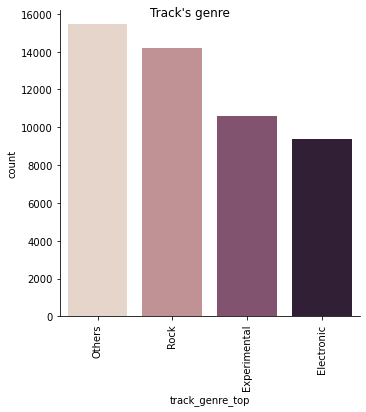

In [717]:
ax = sns.catplot(x = "track_genre_top", data = tracks, kind = 'count', palette="ch:.15", order = tracks['track_genre_top'].value_counts().index)
ax.set_xticklabels(rotation=90)
ax.fig.suptitle("Track's genre")

In [718]:
def number_of_elements(df, column, element):
    return df[df[column] == element].shape[0]

In [719]:
print("{0:27} {1}".format("Tracks of Rock", number_of_elements(tracks, "track_genre_top", "Rock")))
print("{0:27} {1}".format("Tracks of Experimental", number_of_elements(tracks, "track_genre_top", "Experimental")))
print("{0:27} {1}".format("Tracks of Electronic", number_of_elements(tracks, "track_genre_top", "Electronic")))

Tracks of Rock              14182
Tracks of Experimental      10608
Tracks of Electronic        9372


<h3>We create a dataset which contains only the three principal genres Rock, Experimental and Electronic</h3>

In [781]:
df_tracks_part_reduced = tracks.copy()
df_tracks_part_reduced

,track_id,album_date_created,album_date_released,album_id,album_tracks,album_type,artist_active_year_begin,artist_date_created,artist_id,artist_location,...,track_bit_rate,track_date_created,track_duration,track_genre_top,track_genres,track_genres_all,track_number,album_year_created,album_year_released,season_album_created
0,2,2008-11-26,2009-01-05,1,7,Album,2006,2008,1,New Jersey,...,256000,2008,168,Others,[21],[21],3,2008,2009,autumn
1,3,2008-11-26,2009-01-05,1,7,Album,2006,2008,1,New Jersey,...,256000,2008,237,Others,[21],[21],4,2008,2009,autumn
2,5,2008-11-26,2009-01-05,1,7,Album,2006,2008,1,New Jersey,...,256000,2008,206,Others,[21],[21],6,2008,2009,autumn
3,10,2008-11-26,2008-02-06,6,2,Album,0,2008,6,NaN,...,192000,2008,161,Others,[10],[10],1,2008,2008,autumn
4,20,2008-11-26,2009-01-06,4,13,Album,1990,2008,4,Colchester England,...,256000,2008,311,NaN,"[76, 103]","[17, 10, 76, 103]",3,2008,2009,autumn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106569,155316,2017-03-30,2017-02-17,22940,6,Live Performance,0,2017,24357,New Jersey,...,320000,2017,162,Rock,[25],"[25, 12]",3,2017,2017,spring
106570,155317,2017-03-30,2017-02-17,22940,6,Live Performance,0,2017,24357,New Jersey,...,320000,2017,217,Rock,[25],"[25, 12]",4,2017,2017,spring
106571,155318,2017-03-30,2017-02-17,22940,6,Live Performance,0,2017,24357,New Jersey,...,320000,2017,404,Rock,[25],"[25, 12]",6,2017,2017,spring
106572,155319,2017-03-30,2017-02-17,22940,6,Live Performance,0,2017,24357,New Jersey,...,320000,2017,146,Rock,[25],"[25, 12]",5,2017,2017,spring


In [782]:
cols = ["album_year_created", "track_bit_rate", "track_duration", "artist_active_year_begin", "season_album_created"]

<b>We drop all columns that are nonessential</b>

In [783]:
for column in df_tracks_part_reduced.columns:
    if column != 'track_genre_top':
        if column not in cols:
            df_tracks_part_reduced = df_tracks_part_reduced.drop(column, axis =1)
        
df_tracks_part_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106574 entries, 0 to 106573
Data columns (total 6 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   artist_active_year_begin  106574 non-null  int64 
 1   track_bit_rate            106574 non-null  object
 2   track_duration            106574 non-null  object
 3   track_genre_top           49598 non-null   object
 4   album_year_created        106574 non-null  int64 
 5   season_album_created      103045 non-null  object
dtypes: int64(2), object(4)
memory usage: 4.9+ MB


<b>We transform the season column with an ordinal encoding</b>

In [784]:
season_dict = {
    'autumn' : 1,
    'winter' : 2,
    'spring' : 3,
    'summer' : 4
} 

In [785]:
df_tracks_part_reduced['season_ordinal'] = df_tracks_part_reduced.season_album_created.map(season_dict)
df_tracks_part_reduced

,artist_active_year_begin,track_bit_rate,track_duration,track_genre_top,album_year_created,season_album_created,season_ordinal
0,2006,256000,168,Others,2008,autumn,1.0
1,2006,256000,237,Others,2008,autumn,1.0
2,2006,256000,206,Others,2008,autumn,1.0
3,0,192000,161,Others,2008,autumn,1.0
4,1990,256000,311,NaN,2008,autumn,1.0
...,...,...,...,...,...,...,...
106569,0,320000,162,Rock,2017,spring,3.0
106570,0,320000,217,Rock,2017,spring,3.0
106571,0,320000,404,Rock,2017,spring,3.0
106572,0,320000,146,Rock,2017,spring,3.0


In [786]:
cols = ["album_year_created", "track_bit_rate", "track_duration", "artist_active_year_begin", "season_ordinal"]

<b>We convert the dtype of all columns except that of track's genre</b>

In [787]:
for col in df_tracks_part_reduced.columns:
    if col in cols:
        df_tracks_part_reduced.loc[:, col] = pd.to_numeric(df_tracks_part_reduced.loc[:, col], errors = "coerce", downcast='integer')

In [788]:
df_tracks_part_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106574 entries, 0 to 106573
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   artist_active_year_begin  106574 non-null  int16  
 1   track_bit_rate            106574 non-null  int32  
 2   track_duration            106574 non-null  int16  
 3   track_genre_top           49598 non-null   object 
 4   album_year_created        106574 non-null  int16  
 5   season_album_created      103045 non-null  object 
 6   season_ordinal            103045 non-null  float64
dtypes: float64(1), int16(3), int32(1), object(2)
memory usage: 3.5+ MB


In [789]:
del df_tracks_part_reduced['season_album_created']

In [790]:
df_tracks_part_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106574 entries, 0 to 106573
Data columns (total 6 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   artist_active_year_begin  106574 non-null  int16  
 1   track_bit_rate            106574 non-null  int32  
 2   track_duration            106574 non-null  int16  
 3   track_genre_top           49598 non-null   object 
 4   album_year_created        106574 non-null  int16  
 5   season_ordinal            103045 non-null  float64
dtypes: float64(1), int16(3), int32(1), object(1)
memory usage: 2.6+ MB


<b>We observe the distribution of the three main track's genres across variables</b>

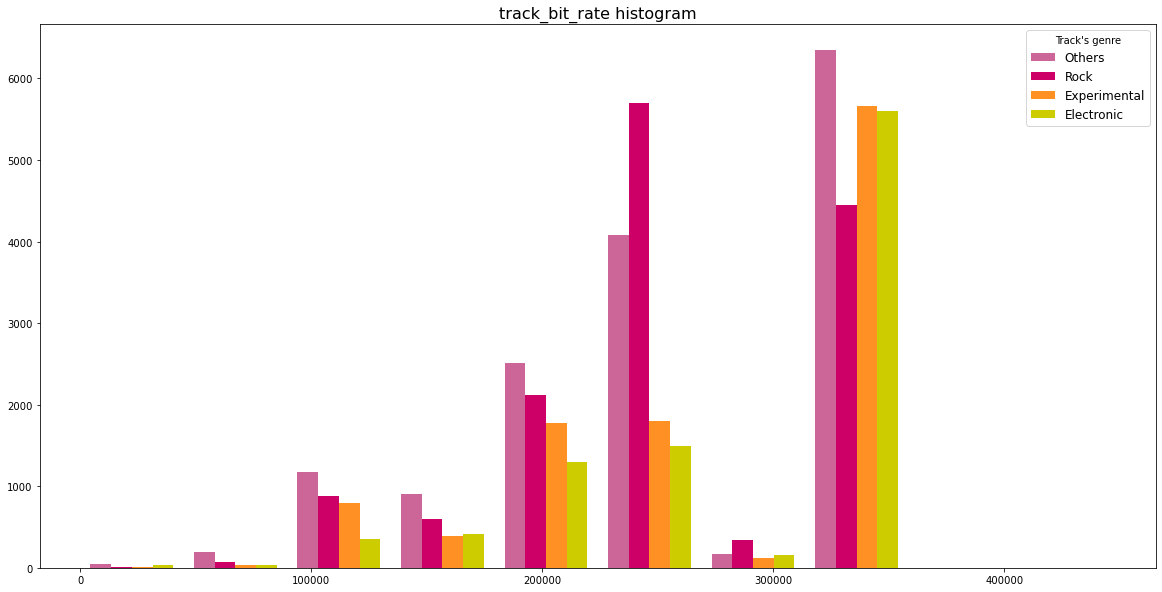

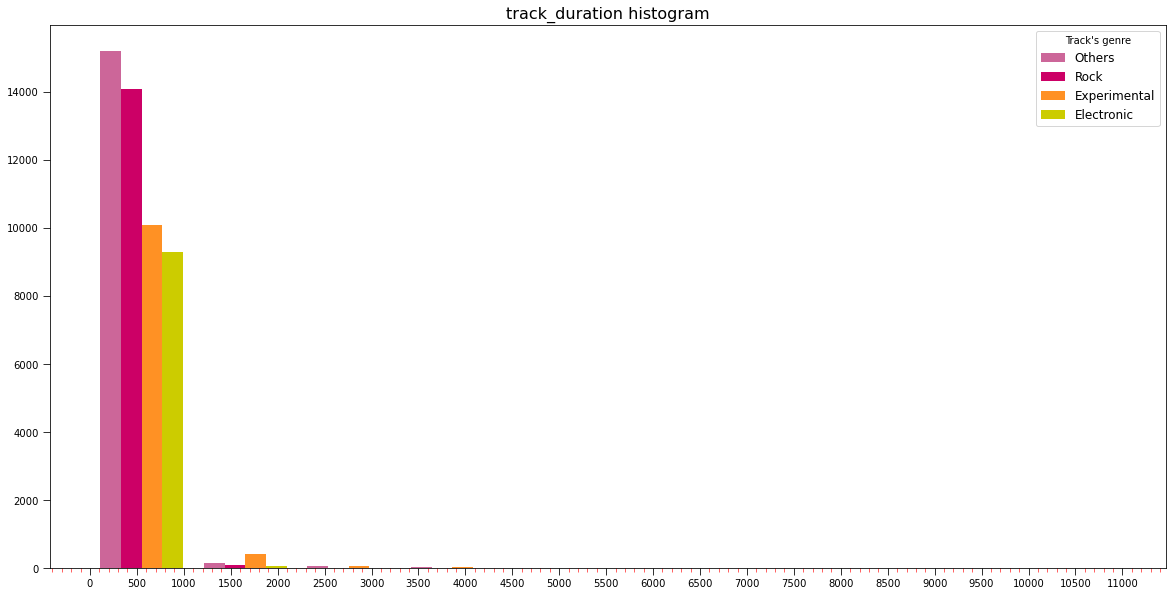

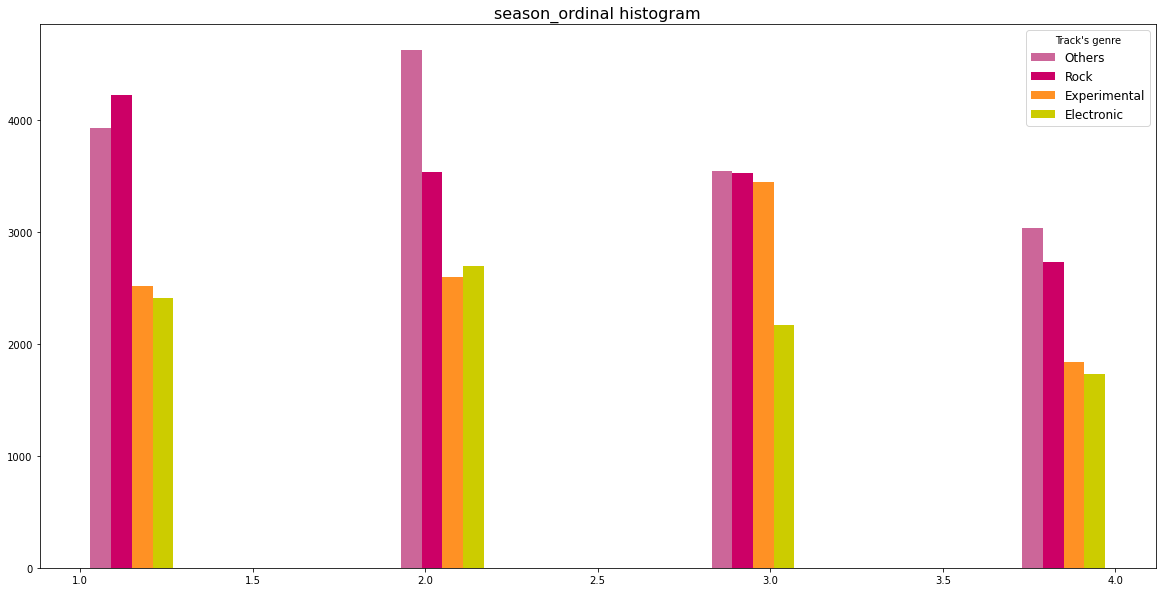

In [1043]:
plot_distributions(df_tracks_part_reduced, 'track_genre_top', True)

<b>We maintain in this dataset only notna values, to realize a significative parallel coordinates plot</b>

In [793]:
df_tracks_reduced = df_tracks_part_reduced[df_tracks_part_reduced['track_genre_top'].notna()]
df_tracks_reduced

,artist_active_year_begin,track_bit_rate,track_duration,track_genre_top,album_year_created,season_ordinal
0,2006,256000,168,Others,2008,1.0
1,2006,256000,237,Others,2008,1.0
2,2006,256000,206,Others,2008,1.0
3,0,192000,161,Others,2008,1.0
9,2006,256000,207,Others,2008,1.0
...,...,...,...,...,...,...
106568,0,320000,38,Rock,2017,3.0
106569,0,320000,162,Rock,2017,3.0
106570,0,320000,217,Rock,2017,3.0
106571,0,320000,404,Rock,2017,3.0


In [794]:
class_column = list(df_tracks_reduced["track_genre_top"].values)

In [795]:
new_column_idx = df_tracks_reduced.columns.get_loc('track_duration')+1
new_column_idx

3

In [796]:
del df_tracks_reduced["track_genre_top"]

<b>We normalize the dataset for the comparisons of the all features</b>

In [797]:
x = df_tracks_reduced.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_tracks_reduced_norm = pd.DataFrame(x_scaled, columns = df_tracks_reduced.columns)

df_tracks_reduced_norm

,artist_active_year_begin,track_bit_rate,track_duration,album_year_created,season_ordinal
0,0.99504,0.571430,0.015231,0.995538,0.000000
1,0.99504,0.571430,0.021487,0.995538,0.000000
2,0.99504,0.571430,0.018676,0.995538,0.000000
3,0.00000,0.428573,0.014597,0.995538,0.000000
4,0.99504,0.571430,0.018767,0.995538,0.000000
...,...,...,...,...,...
49593,0.00000,0.714286,0.003445,1.000000,0.666667
49594,0.00000,0.714286,0.014687,1.000000,0.666667
49595,0.00000,0.714286,0.019674,1.000000,0.666667
49596,0.00000,0.714286,0.036627,1.000000,0.666667


In [799]:
df_tracks_reduced_norm.insert(new_column_idx, 'track_genre_top', class_column)

In [800]:
df_tracks_reduced_norm

,artist_active_year_begin,track_bit_rate,track_duration,track_genre_top,album_year_created,season_ordinal
0,0.99504,0.571430,0.015231,Others,0.995538,0.000000
1,0.99504,0.571430,0.021487,Others,0.995538,0.000000
2,0.99504,0.571430,0.018676,Others,0.995538,0.000000
3,0.00000,0.428573,0.014597,Others,0.995538,0.000000
4,0.99504,0.571430,0.018767,Others,0.995538,0.000000
...,...,...,...,...,...,...
49593,0.00000,0.714286,0.003445,Rock,1.000000,0.666667
49594,0.00000,0.714286,0.014687,Rock,1.000000,0.666667
49595,0.00000,0.714286,0.019674,Rock,1.000000,0.666667
49596,0.00000,0.714286,0.036627,Rock,1.000000,0.666667


<b>We realize the parallel coordinates plot for the three main track's genres</b>

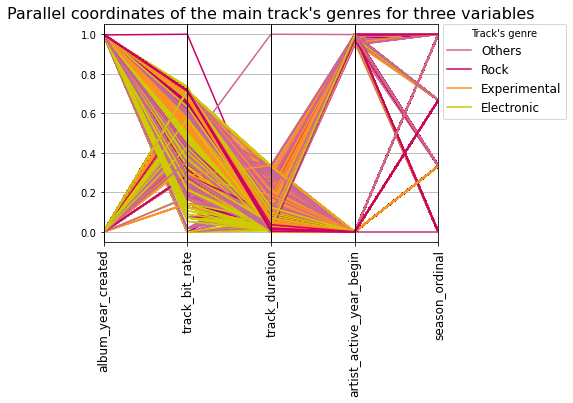

In [801]:
ax1 = parallel_coordinates(df_tracks_reduced_norm, 'track_genre_top', cols = cols, 
                                     color=('#CC6699','#CC0066', '#FF9124', '#CCCC00'))

ax1.legend(loc='upper right', bbox_to_anchor = (1.4, 1.03), title = "Track's genre", frameon = True, fontsize = 12)

plt.title("Parallel coordinates of the main track's genres for three variables", fontsize = 16)
plt.xticks(rotation=90, fontsize = 12)
plt.show()

<b>Now we realize the radar plot of the three main track's genres</b>

In [802]:
categories = [i for i in df_tracks_reduced_norm.columns if i != 'track_genre_top']
categories

['artist_active_year_begin',
 'track_bit_rate',
 'track_duration',
 'album_year_created',
 'season_ordinal']

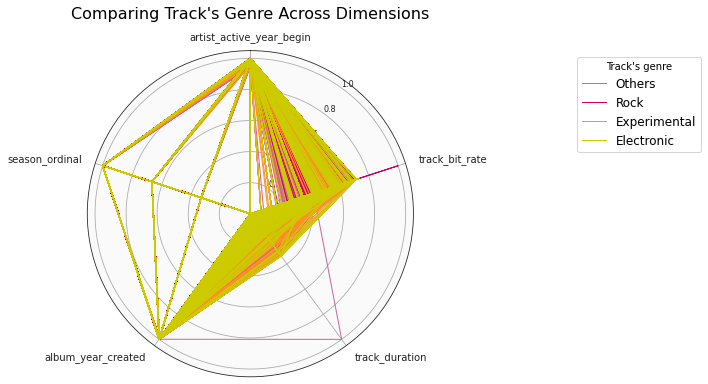

In [803]:
plot_radar_plot(df_tracks_reduced_norm, categories, 'track_genre_top', "Track's genre", True)

<b>Since we notice the presence of two very different values from the rest, let's check which they are, as we suspect that they are outliers</b>

In [804]:
df_tracks_reduced_norm[df_tracks_reduced_norm['track_duration'] > 0.7]

,artist_active_year_begin,track_bit_rate,track_duration,track_genre_top,album_year_created,season_ordinal
40362,0.998512,0.428573,1.0,Others,0.999008,1.0


In [805]:
df_tracks_reduced_norm[df_tracks_reduced_norm['track_bit_rate'] > 0.8]

,artist_active_year_begin,track_bit_rate,track_duration,track_genre_top,album_year_created,season_ordinal
13745,0.0,1.0,0.001632,Rock,0.996529,0.0


<h2>Experiments</h2>

<h3>Track duration</h3>

In [810]:
(df_tracks_part_reduced['track_duration']).describe()

count    106574.000000
mean        277.849100
std         305.518553
min           0.000000
25%         149.000000
50%         216.000000
75%         305.000000
max       18350.000000
Name: track_duration, dtype: float64

In [887]:
genre_unique = [genre for genre in df_tracks_part_reduced['track_genre_top'].dropna().unique()]
genre_unique

['Others', 'Rock', 'Experimental', 'Electronic']

In [901]:
for genre in genre_unique:
    print(genre)
    print()
    dfc = df_tracks_part_reduced[df_tracks_part_reduced['track_genre_top'] == genre]
    print(dfc['track_duration'].describe())
    print('------------------------------------')

Others

count    15436.000000
mean       246.574825
std        286.772587
min          0.000000
25%        146.000000
50%        202.000000
75%        266.000000
max      11030.000000
Name: track_duration, dtype: float64
------------------------------------
Rock

count    14182.000000
mean       225.497109
std        189.649111
min          2.000000
25%        136.000000
50%        189.000000
75%        260.000000
max       3675.000000
Name: track_duration, dtype: float64
------------------------------------
Experimental

count    10608.000000
mean       362.668458
std        390.914861
min          1.000000
25%        145.000000
50%        256.000000
75%        436.000000
max       3718.000000
Name: track_duration, dtype: float64
------------------------------------
Electronic

count    9372.000000
mean      263.770700
std       226.632493
min         4.000000
25%       171.000000
50%       240.000000
75%       313.000000
max      3714.000000
Name: track_duration, dtype: float64
-----

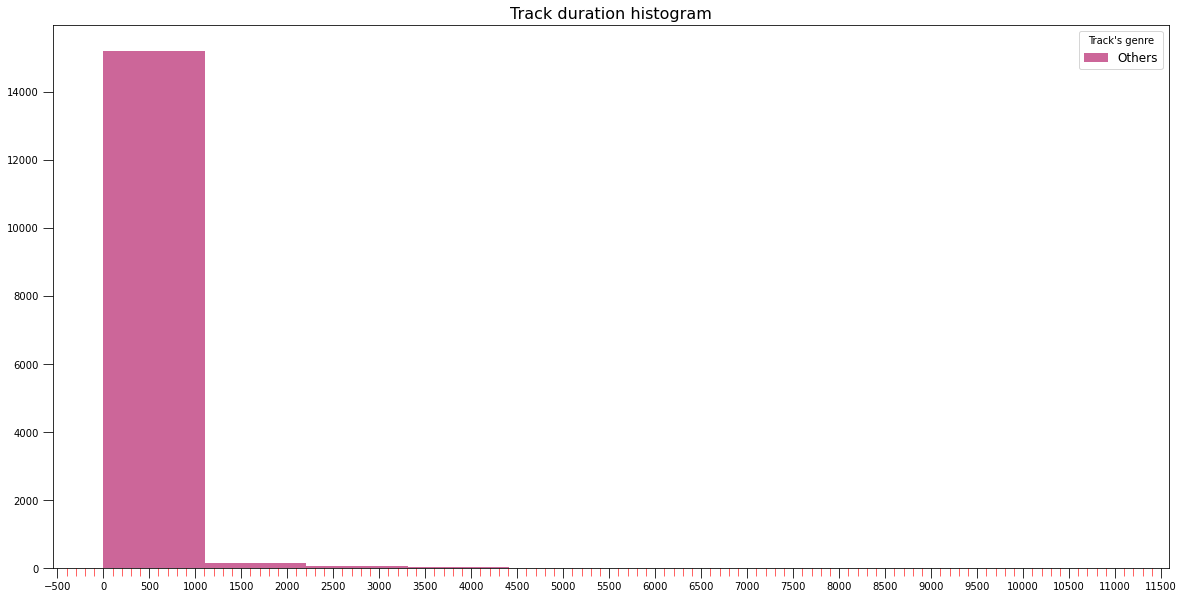

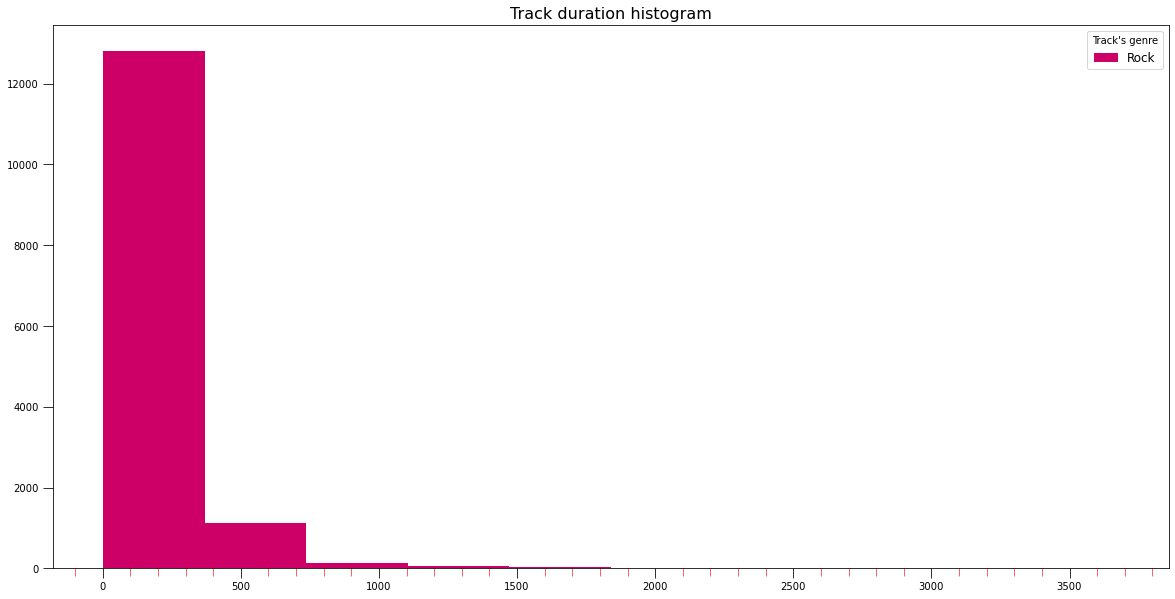

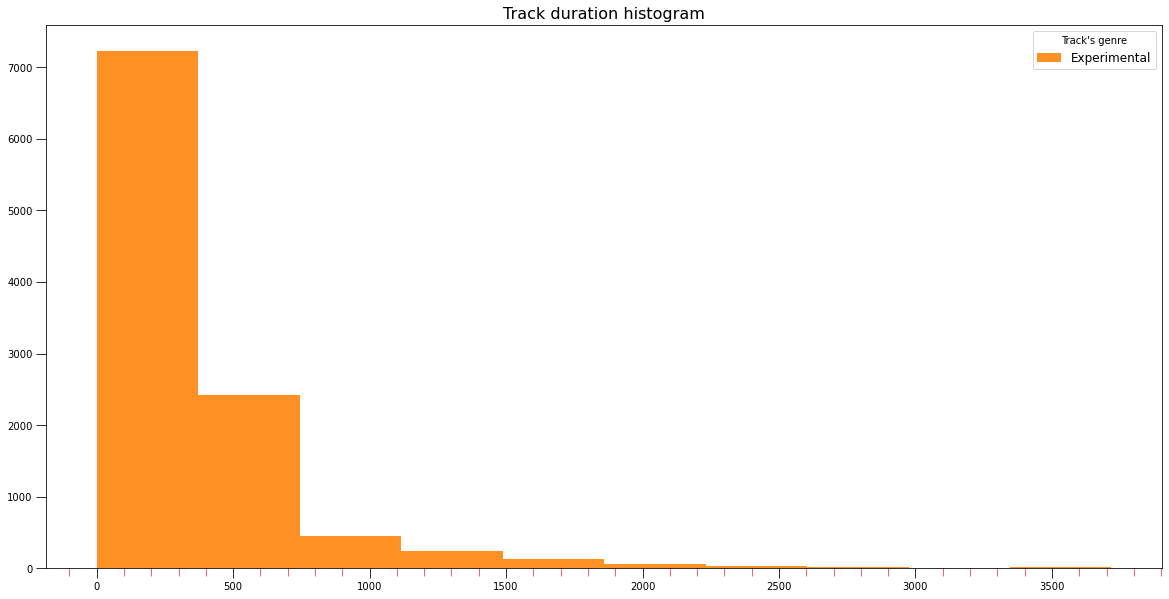

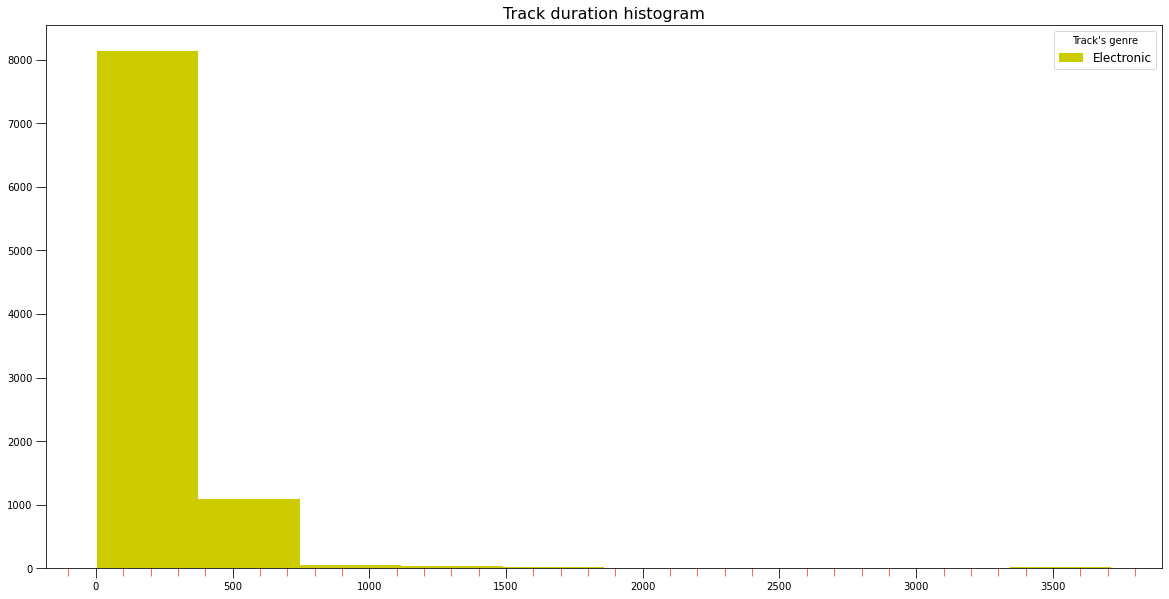

In [905]:
colors = ['#CC6699','#CC0066', '#FF9124', '#CCCC00']

for i, genre in enumerate(df_tracks_part_reduced['track_genre_top'].dropna().unique()):
    
    fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (20, 10))
    color = colors[i]

    distrib = df_tracks_part_reduced[df_tracks_part_reduced['track_genre_top'] == genre]['track_duration']
    ax.hist(distrib, label = genre, color = color)
    ax.legend(loc='upper right', title = "Track's genre", frameon=True, fontsize = 12)
    ax.set_title('Track duration' + " histogram", fontsize = 16)
            
    
    ax.xaxis.set_major_locator(MultipleLocator(500))
    ax.xaxis.set_minor_locator(MultipleLocator(100))
    ax.tick_params(which='major', length=10)
    ax.tick_params(which='minor', length=8, color='r')

    plt.show()

In [1045]:
tr_dr = df_tracks_part_reduced[df_tracks_part_reduced['track_duration'] > 4000]
tr_dr

,artist_active_year_begin,track_bit_rate,track_duration,track_genre_top,album_year_created,season_ordinal
1681,1973,256000,18350,NaN,2008,2.0
70994,0,206437,10999,NaN,2014,4.0
74094,1998,320000,7372,NaN,2014,1.0
74775,2013,192000,11016,NaN,2015,2.0
82355,2013,192000,11030,Others,2015,4.0
86007,2013,192000,7320,NaN,2015,1.0


In [919]:
for genre in genre_unique:
    count = 0
    for i, row in enumerate(tr_dr['track_genre_top']):
        if (row == genre):
            count+=1
        
    print("{0:27} {1}".format(genre, count))

Others                      1
Rock                        0
Experimental                0
Electronic                  0


In [924]:
no_genre = df_tracks_part_reduced[df_tracks_part_reduced['track_genre_top'].isna()]

In [925]:
no_genre[no_genre['track_duration'] > 4000]

,artist_active_year_begin,track_bit_rate,track_duration,track_genre_top,album_year_created,season_ordinal
1681,1973,256000,18350,NaN,2008,2.0
70994,0,206437,10999,NaN,2014,4.0
74094,1998,320000,7372,NaN,2014,1.0
74775,2013,192000,11016,NaN,2015,2.0
86007,2013,192000,7320,NaN,2015,1.0


<h3>Track bit rate</h3>

In [976]:
for genre in genre_unique:
    print(genre)
    print()
    dfc = df_tracks_part_reduced[df_tracks_part_reduced['track_genre_top'] == genre]
    print(dfc['track_bit_rate'].describe())
    print('------------------------------------')

Others

count     15436.000000
mean     253330.221107
std       69291.187817
min          -1.000000
25%      192000.000000
50%      256000.000000
75%      320000.000000
max      324221.000000
Name: track_bit_rate, dtype: float64
------------------------------------
Rock

count     14182.000000
mean     253943.741362
std       59443.394046
min          -1.000000
25%      203730.750000
50%      256000.000000
75%      320000.000000
max      448000.000000
Name: track_bit_rate, dtype: float64
------------------------------------
Experimental

count     10608.000000
mean     265434.069193
std       67695.188434
min          -1.000000
25%      192000.000000
50%      320000.000000
75%      320000.000000
max      322892.000000
Name: track_bit_rate, dtype: float64
------------------------------------
Electronic

count      9372.000000
mean     275473.840909
std       63060.353944
min          -1.000000
25%      254075.000000
50%      320000.000000
75%      320000.000000
max      330042.000000
Na

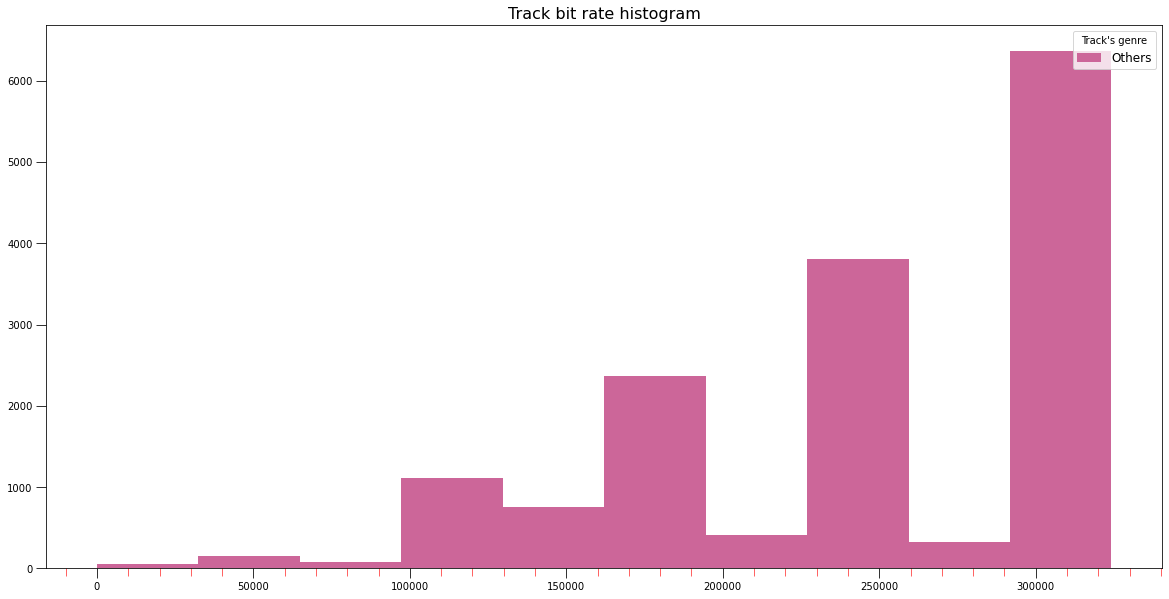

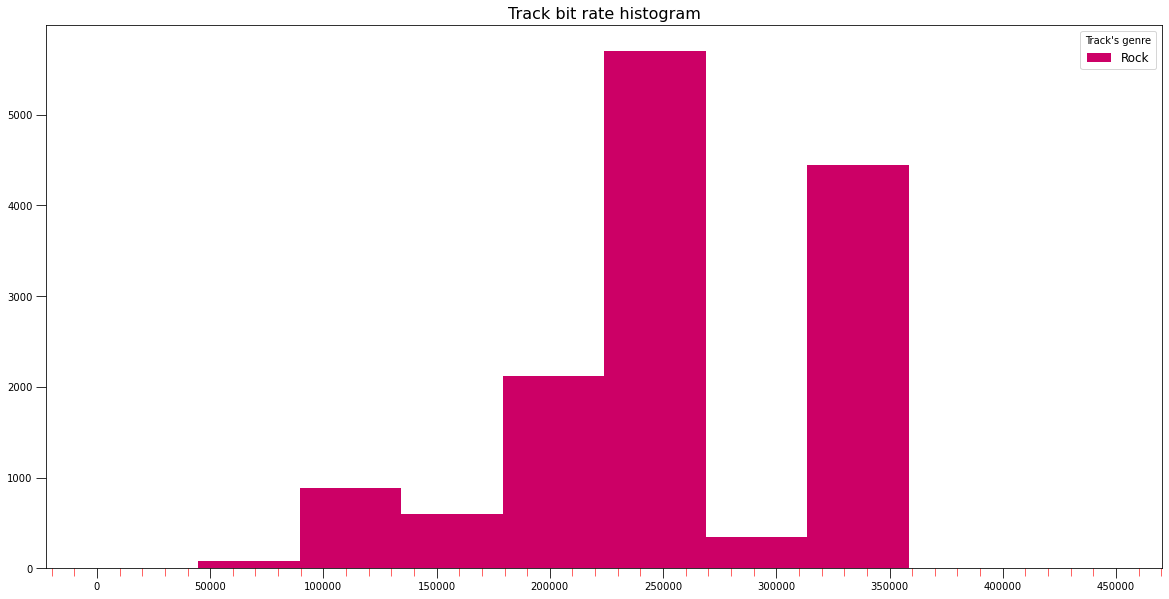

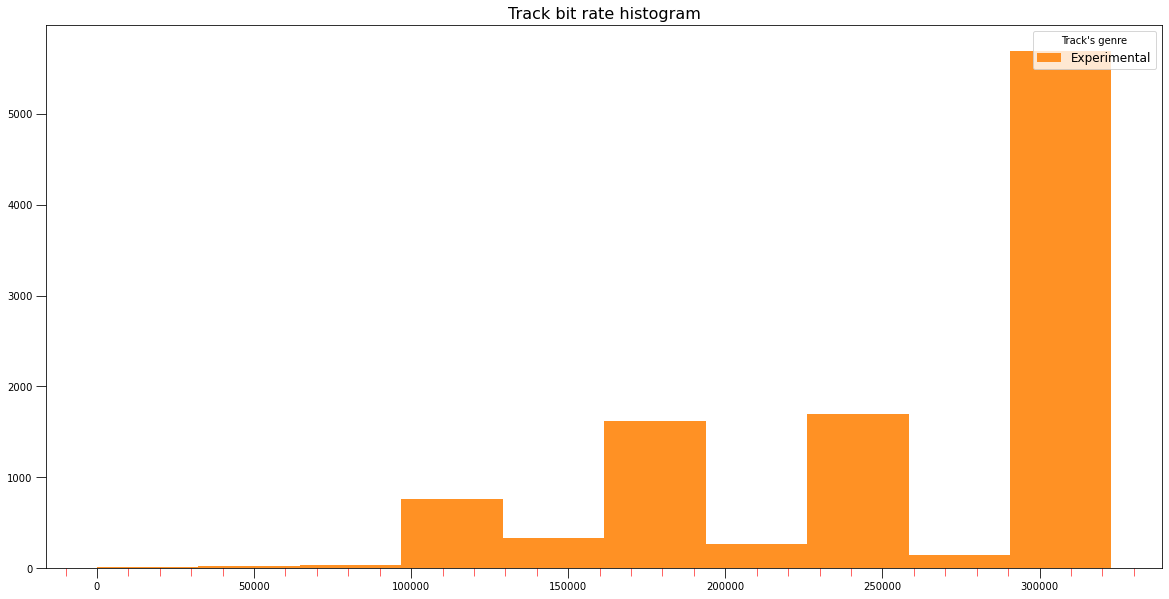

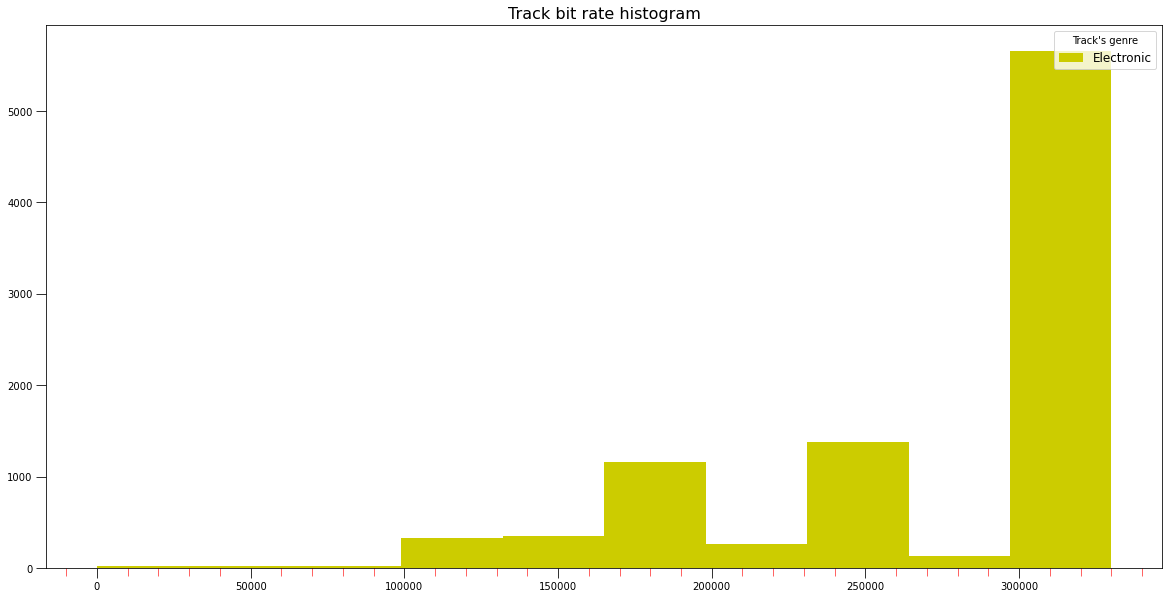

In [1013]:
colors = ['#CC6699','#CC0066', '#FF9124', '#CCCC00']

for i, genre in enumerate(df_tracks_part_reduced['track_genre_top'].dropna().unique()):
    
    fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (20, 10))
    color = colors[i]

    distrib = df_tracks_part_reduced[df_tracks_part_reduced['track_genre_top'] == genre]['track_bit_rate']
    ax.hist(distrib, label = genre, color = color)
    ax.legend(loc='upper right', title = "Track's genre", frameon=True, fontsize = 12)
    ax.set_title('Track bit rate' + " histogram", fontsize = 16)
            
    
    ax.xaxis.set_major_locator(MultipleLocator(50000))
    ax.xaxis.set_minor_locator(MultipleLocator(10000))
    ax.tick_params(which='major', length=10)
    ax.tick_params(which='minor', length=8, color='r')

    plt.show()

<h3>Album year created</h3>

In [931]:
for genre in genre_unique:
    print(genre)
    print()
    dfc = df_tracks_part_reduced[df_tracks_part_reduced['track_genre_top'] == genre]
    print(dfc['album_year_created'].describe())
    print('------------------------------------')

Others

count    15436.000000
mean      1971.931394
std        282.320684
min          0.000000
25%       2010.000000
50%       2012.000000
75%       2015.000000
max       2017.000000
Name: album_year_created, dtype: float64
------------------------------------
Rock

count    14182.000000
mean      1988.931462
std        213.821485
min          0.000000
25%       2009.000000
50%       2012.000000
75%       2014.000000
max       2017.000000
Name: album_year_created, dtype: float64
------------------------------------
Experimental

count    10608.000000
mean      1971.688066
std        282.937388
min          0.000000
25%       2010.000000
50%       2012.000000
75%       2014.000000
max       2017.000000
Name: album_year_created, dtype: float64
------------------------------------
Electronic

count    9372.000000
mean     1933.988156
std       389.351812
min         0.000000
25%      2010.000000
50%      2012.000000
75%      2014.000000
max      2017.000000
Name: album_year_created, dtyp

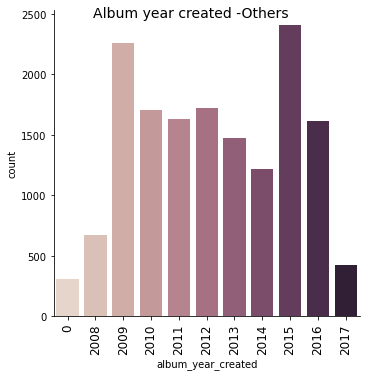

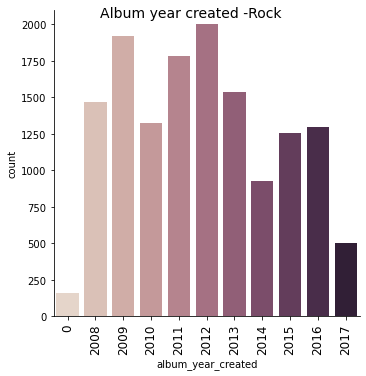

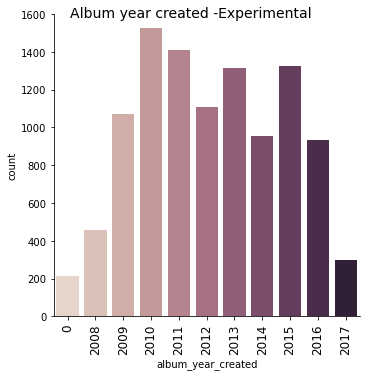

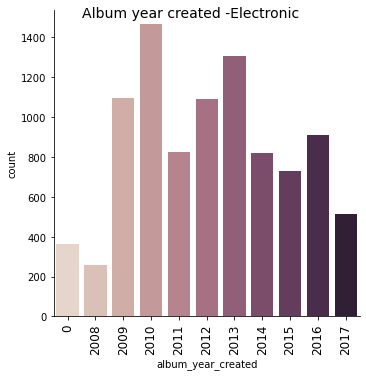

In [1039]:
for genre in genre_unique:
    df = df_tracks_part_reduced[df_tracks_part_reduced['track_genre_top'] == genre]
    list_y = [year for year in df['album_year_created'].dropna().unique()]
    
    ax = sns.catplot(x = "album_year_created", data = df, kind = 'count', palette="ch:.15")
    ax.set_xticklabels(rotation=90, fontsize = 12)
    ax.fig.suptitle("Album year created -{}".format(genre), fontsize = 14)
    
    plt.show()

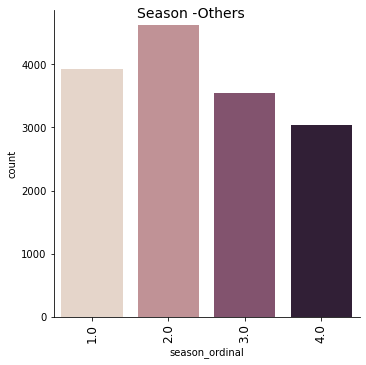

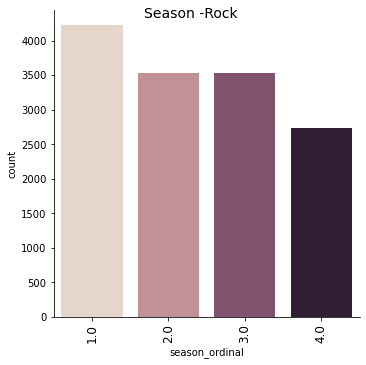

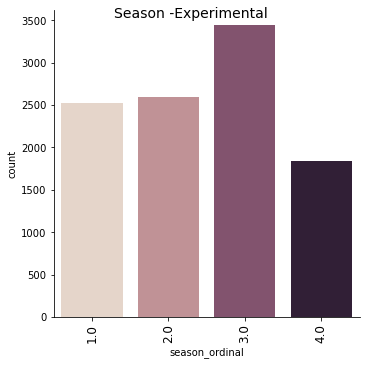

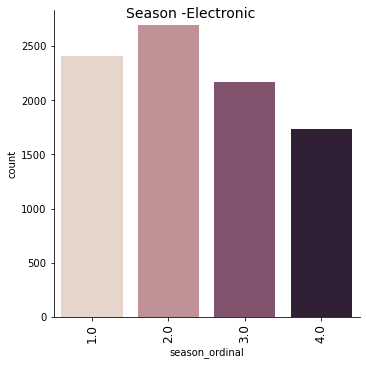

In [1049]:
for genre in genre_unique:
    df = df_tracks_part_reduced[df_tracks_part_reduced['track_genre_top'] == genre]
    list_s = [s for s in df['season_ordinal'].dropna().unique()]
    
    ax = sns.catplot(x = "season_ordinal", data = df, kind = 'count', palette="ch:.15")
    ax.set_xticklabels(rotation=90, fontsize = 12)
    ax.fig.suptitle("Season -{}".format(genre), fontsize = 14)
    
    plt.show()

In [1054]:
p1 = df_tracks_part_reduced[(df_tracks_part_reduced['track_bit_rate'] > 290000) & (df_tracks_part_reduced['season_ordinal'] == 2.0) & (df_tracks_part_reduced['track_duration'] < 800)]
p1

,artist_active_year_begin,track_bit_rate,track_duration,track_genre_top,album_year_created,season_ordinal
3258,0,320000,177,Electronic,2009,2.0
3259,0,320000,278,NaN,2009,2.0
3260,0,320000,175,NaN,2009,2.0
3523,2006,320000,54,NaN,2009,2.0
3524,2006,320000,166,NaN,2009,2.0
...,...,...,...,...,...,...
106302,0,320000,272,NaN,2017,2.0
106303,0,320000,266,NaN,2017,2.0
106304,0,320000,165,NaN,2017,2.0
106322,0,320000,564,Experimental,2016,2.0


In [1067]:
for genre in genre_unique:
    count = 0
    for i, row in enumerate(p1['track_genre_top']):
        if (row == genre):
            count+=1
        
    print("{0:27} {1}".format(genre, count)) 

Others                      1829
Rock                        1648
Experimental                1391
Electronic                  1748


In [1071]:
years = [i for i in df_tracks_part_reduced['album_year_created'].unique()]
years

[2008, 2009, 0, 2010, 2011, 2012, 2013, 2014, 2016, 2015, 2017]

In [1084]:
for y in years:
    
    l = [i for i in (p1[p1['album_year_created'] == y]['track_genre_top'])] #inserisco tutti i generi per un anno
    
    if l:
        print(y)
        for genre in genre_unique:
            count = 0
            for i in l:
                if i == genre:
                    count+=1
            print("{0:20} {1}".format(genre, count))
        
    print()


2009
Others               10
Rock                 3
Experimental         5
Electronic           46


2010
Others               114
Rock                 54
Experimental         124
Electronic           156

2011
Others               115
Rock                 183
Experimental         203
Electronic           87

2012
Others               240
Rock                 297
Experimental         169
Electronic           178

2013
Others               185
Rock                 243
Experimental         172
Electronic           266

2014
Others               125
Rock                 52
Experimental         230
Electronic           233

2016
Others               454
Rock                 296
Experimental         220
Electronic           208

2015
Others               334
Rock                 98
Experimental         121
Electronic           256

2017
Others               252
Rock                 422
Experimental         147
Electronic           318



In [1108]:
p2 = df_tracks_part_reduced[(df_tracks_part_reduced['track_bit_rate'] >= 170000) & (df_tracks_part_reduced['track_bit_rate'] <= 270000) & (df_tracks_part_reduced['season_ordinal'] == 1) & (df_tracks_part_reduced['track_duration'] < 700)]
p2

,artist_active_year_begin,track_bit_rate,track_duration,track_genre_top,album_year_created,season_ordinal
0,2006,256000,168,Others,2008,1.0
1,2006,256000,237,Others,2008,1.0
2,2006,256000,206,Others,2008,1.0
3,0,192000,161,Others,2008,1.0
4,1990,256000,311,NaN,2008,1.0
...,...,...,...,...,...,...
103051,0,192000,219,Others,2011,1.0
103052,0,192000,181,Others,2011,1.0
103055,0,202681,211,Others,2011,1.0
103056,0,239043,182,Others,2011,1.0


In [1110]:
for y in years:
    
    l = [i for i in (p2[p2['album_year_created'] == y]['track_genre_top'])] #inserisco tutti i generi per un anno
    
    if l:
        print("- ", y)
        for genre in genre_unique:
            count = 0
            for i in l:
                if i == genre:
                    count+=1
            print("{0:20} {1}".format(genre, count))
        
    print()

-  2008
Others               509
Rock                 1129
Experimental         317
Electronic           157

-  2009
Others               273
Rock                 248
Experimental         121
Electronic           126


-  2010
Others               129
Rock                 176
Experimental         161
Electronic           63

-  2011
Others               139
Rock                 279
Experimental         73
Electronic           87

-  2012
Others               156
Rock                 245
Experimental         24
Electronic           33

-  2013
Others               80
Rock                 177
Experimental         47
Electronic           115

-  2014
Others               118
Rock                 153
Experimental         54
Electronic           22

-  2016
Others               74
Rock                 49
Experimental         14
Electronic           33

-  2015
Others               201
Rock                 103
Experimental         71
Electronic           44


